In [1]:
from filter_forecast.particle_filter.transition import GaussianNoiseModel
from filter_forecast.particle_filter.log_pf import ModelParameters

params = ModelParameters()
model = GaussianNoiseModel(params)

In [2]:
import jax.numpy as jnp

days = 150
initial_state = jnp.array([9995, 5, 0, 0, 0])
states = jnp.zeros((days, 5))
states = states.at[0].set(initial_state)

curr_state = initial_state
for t in range(1, days):
    curr_state += model.det_component(curr_state, t=0, beta=0.2)
    states = states.at[t].set(curr_state)

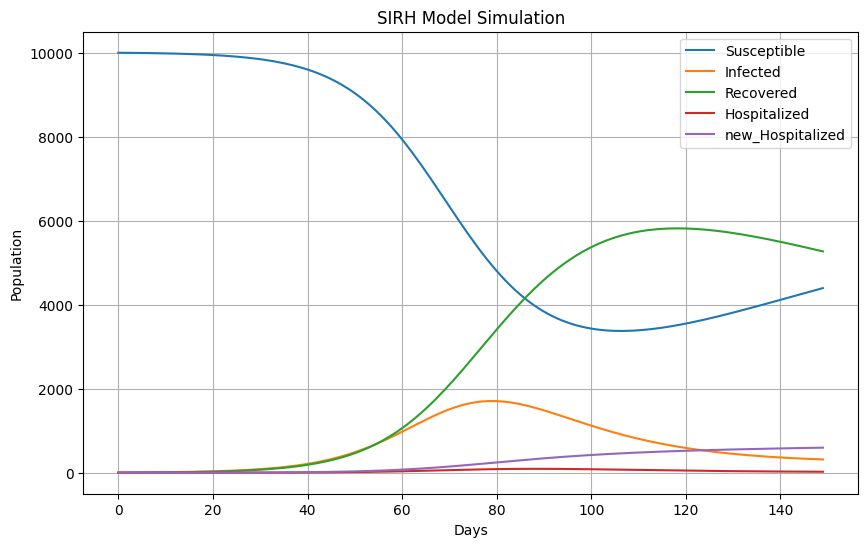

In [3]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(states[:, 0], label="Susceptible")
plt.plot(states[:, 1], label="Infected")
plt.plot(states[:, 2], label="Recovered")
plt.plot(states[:, 3], label="Hospitalized")
plt.plot(states[:, 4], label="new_Hospitalized")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("SIRH Model Simulation")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from filter_forecast.particle_filter.init_settings import InitSettings
from filter_forecast.particle_filter.particle_cloud import ParticleCloud

settings = InitSettings(
    num_particles=10,
    population=10000,
    location_code="04",
    runtime=days,
    prediction_date="2024-07-22",
)

In [5]:
from filter_forecast.particle_filter.log_pf import run_pf

output = run_pf(settings=settings, observation_data=states[:, 5], runtime=days)

Initial states shape: (10, 5)
States shape after initialization: (10, 5, 150)
States shape after setting initial states: (10, 5, 150)
Initial Betas: [0.13878489 0.12934316 0.11234155 0.13410246 0.1497005  0.14751063
 0.12913393 0.10023582 0.13239756 0.10341796]
Initial beta array (10, 150)
Iteration: 1 
Indices: [0 1 2 3 4 5 6 7 8 9]
Betas before: [[0.13878489 0.         0.         ... 0.         0.         0.        ]
 [0.12934317 0.         0.         ... 0.         0.         0.        ]
 [0.11234155 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.10023582 0.         0.         ... 0.         0.         0.        ]
 [0.13239756 0.         0.         ... 0.         0.         0.        ]
 [0.10341796 0.         0.         ... 0.         0.         0.        ]]
Betas after: [[0.13878489 0.         0.         ... 0.         0.         0.        ]
 [0.12934317 0.         0.         ... 0.         0.         0.        ]
 [0.11234155 0.         0.         ... 0.      

/home/andrew/Documents/code/PF_forecast/filter_forecast/particle_filter/particle_cloud.py:242: RuntimeWarning: divide by zero encountered in log
  new_betas = np.exp(np.random.normal(np.log(self.betas[:, t]),scale=np.sqrt(0.001)))


Indices: [0 0 0 0 0 0 0 0 0 0]
Betas before: [[0.14033318 0.         0.         ... 0.         0.         0.        ]
 [0.13151853 0.         0.         ... 0.         0.         0.        ]
 [0.10715684 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.10250145 0.         0.         ... 0.         0.         0.        ]
 [0.13527277 0.         0.         ... 0.         0.         0.        ]
 [0.10564596 0.         0.         ... 0.         0.         0.        ]]
Betas after: [[0.14033318 0.         0.         ... 0.         0.         0.        ]
 [0.13151853 0.         0.         ... 0.         0.         0.        ]
 [0.10715684 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.10250145 0.         0.         ... 0.         0.         0.        ]
 [0.13527277 0.         0.         ... 0.         0.         0.        ]
 [0.10564596 0.         0.         ... 0.         0.         0.        ]] 

Iteration: 6 
[[nan nan nan nan nan]
 [nan nan nan n

KeyboardInterrupt: 